<a href="https://colab.research.google.com/github/akhilesh2510/Car_Price_Prediction/blob/main/Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


# **Data Collection and Processing**

In [ ]:
car_dataset=pd.read_csv("/content/car data.csv")
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# This confirms how clean the data is
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [ ]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
print(car_dataset['Transmission'].value_counts())
print(car_dataset['Seller_Type'].value_counts())
print(car_dataset['Fuel_Type'].value_counts())

Transmission
0    261
1     40
Name: count, dtype: int64
Seller_Type
0    195
1    106
Name: count, dtype: int64
Fuel_Type
0    239
1     60
2      2
Name: count, dtype: int64


# **Splitting the Data into Training and Test Data**

In [ ]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

# **Training the Model**

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Prediction on Training Data
training_data_prediction=model.predict(X_train)


In [ ]:
# R Sqaured Error
error_score=metrics.r2_score(Y_train,training_data_prediction)

print("The accuracy of the model is: ",error_score)

The accuracy of the model is:  0.8838169193709796


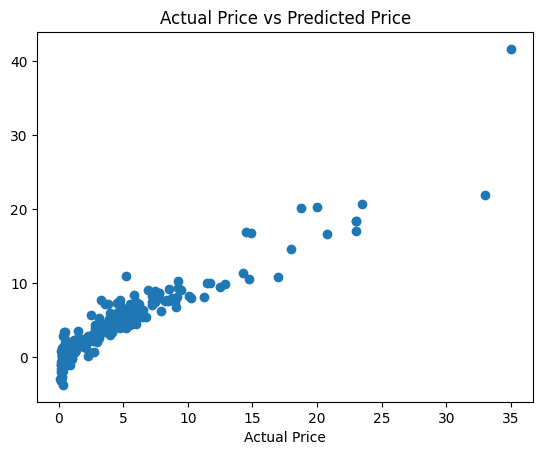

In [ ]:
# Visualize the Actual and Predicted Prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel=("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction=model.predict(X_test)

error_score=metrics.r2_score(Y_test,test_data_prediction)

print("The accuracy of the model is: ",error_score)

The accuracy of the model is:  0.8401532365377697


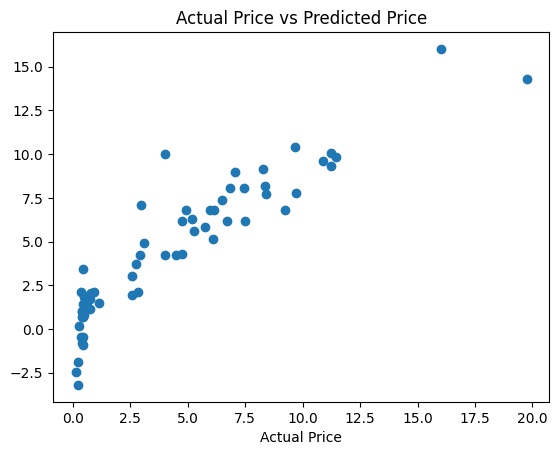

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel=("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# **Lasso Regression**

In [ ]:
lasso_model=Lasso()

In [ ]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [ ]:
# Prediction on Training Data
training_data_prediction=lasso_model.predict(X_train)


In [ ]:
# R Sqaured Error
error_score=metrics.r2_score(Y_train,training_data_prediction)

print("The accuracy of the model is: ",error_score)

The accuracy of the model is:  0.843587395258283


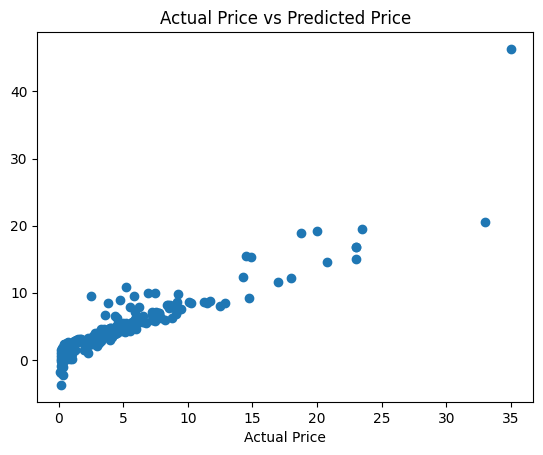

In [ ]:
# Visualize the Actual and Predicted Prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel=("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction=lasso_model.predict(X_test)

error_score=metrics.r2_score(Y_test,test_data_prediction)

print("The accuracy of the model is: ",error_score)

The accuracy of the model is:  0.8497457570738539


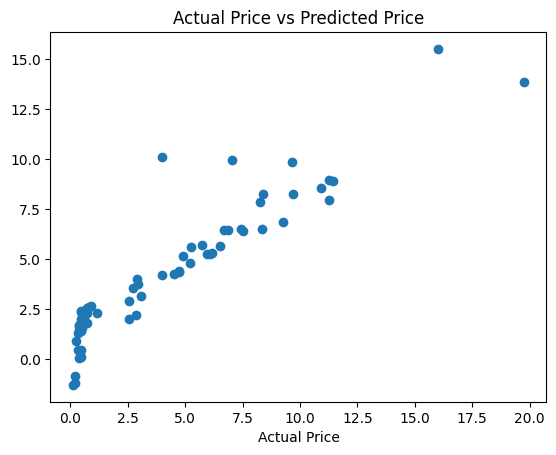

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel=("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()